<a href="https://colab.research.google.com/github/Jatin-Miglani/Learn-ML/blob/main/Research_ML_Day10_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/income.csv')


In [ ]:
data.head()


,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


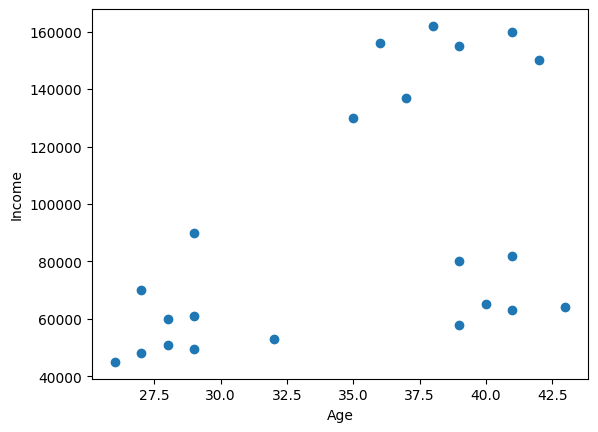

In [ ]:
plt.scatter(data['Age'],data['Income($)'])
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [ ]:
x=data[['Age','Income($)']]
x

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Age']=scaler.fit_transform(data[['Age']])
data['Income($)']=scaler.fit_transform(data[['Income($)']])

In [ ]:
x=data[['Age','Income($)']]
x

,Age,Income($)
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417
5,0.725332,1.519048
6,1.072230,1.636679
7,0.551883,1.683732
8,0.204985,1.542574
9,0.031536,0.930891


In [ ]:
####  Plot Dendrogram


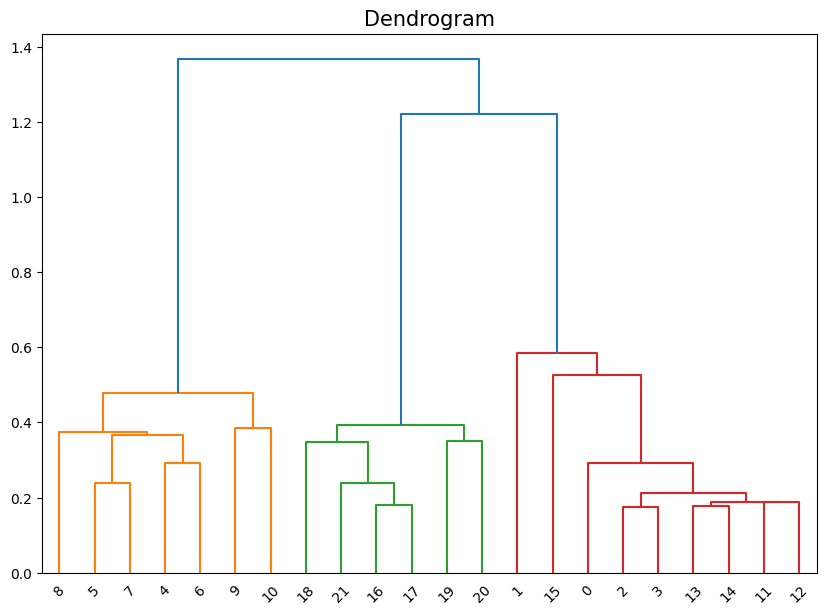

In [ ]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))
dendrogram = sch.dendrogram(sch.linkage(x,method='single'))  #method=Complete, average, ward and single
plt.title("Dendrogram",fontsize=15)
plt.show()

In [ ]:
#by dendrogram which line you will consider and how many clustering pts you will consider here.
#line 1.4 to 1.2 is very much proper
#3 clusters 4-6, 17 and 20


In [ ]:
#AgglomerativeClustering,
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,linkage='single',affinity='euclidean')
cl=cluster.fit_predict(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
cl

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [ ]:
x['Cluster']=cl
x

,Age,Income($),Cluster
0,-1.356055,-0.480684,0
1,-1.009157,-0.010159,0
2,-1.009157,-0.692421,0
3,-1.182606,-0.715947,0
4,1.245679,1.401417,1
5,0.725332,1.519048,1
6,1.072230,1.636679,1
7,0.551883,1.683732,1
8,0.204985,1.542574,1
9,0.031536,0.930891,1


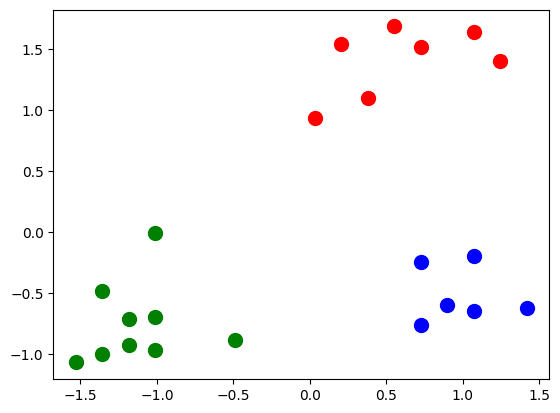

In [ ]:
df1 = x[x['Cluster']==0]
df2 = x[x['Cluster']==1]
df3 = x[x['Cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green',label="Cluster1", s=100)
plt.scatter(df2['Age'],df2['Income($)'],color='red',label="Cluster1", s=100)
plt.scatter(df3['Age'],df3['Income($)'],color='blue',label="Cluster1", s=100)
#i want all rows and cols
plt.show()

In [ ]:
#same result we got here.
#this is how we apply agglomerative clustering